# Drug Recommendation using Machine Learning 

### Importing Libraries

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Datset

In [275]:
drug_df = pd.read_csv("drug200.csv")

In [276]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,drugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,drugY


In [277]:
drug_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.57,drugC
196,16,M,LOW,HIGH,12.01,drugC
197,52,M,NORMAL,HIGH,9.89,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX
199,40,F,LOW,NORMAL,11.35,drugX


### Data Overview

In [278]:
drug_df.shape

(200, 6)

In [279]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [280]:
drug_df.describe()

,Age,Na_to_K
count,200.00,200.00
mean,44.31,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


### Data Preprocessing

In [281]:
from sklearn.preprocessing import LabelEncoder

In [282]:
drug_df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [283]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [284]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [285]:
drug_df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

##### Label Encoding Sex and Cholesterol columns

In [286]:
drug_df['Sex'] = LabelEncoder().fit_transform(drug_df['Sex'])
drug_df['Cholesterol'] = LabelEncoder().fit_transform(drug_df['Cholesterol'])

In [287]:
drug_df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [288]:
drug_df['Sex'].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

In [289]:
drug_df['Cholesterol'].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

##### Creating dummy variables in BP column

In [290]:
drug_df = pd.get_dummies(drug_df, columns=["BP"], prefix="BP", prefix_sep="_", drop_first=True)

In [291]:
drug_df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,0,0,25.36,drugY,False,False
1,47,1,0,13.09,drugC,True,False
2,47,1,0,10.11,drugC,True,False
3,28,0,0,7.80,drugX,False,True
4,61,0,0,18.04,drugY,True,False


### Data Visualization

Text(0, 0.5, 'Count')

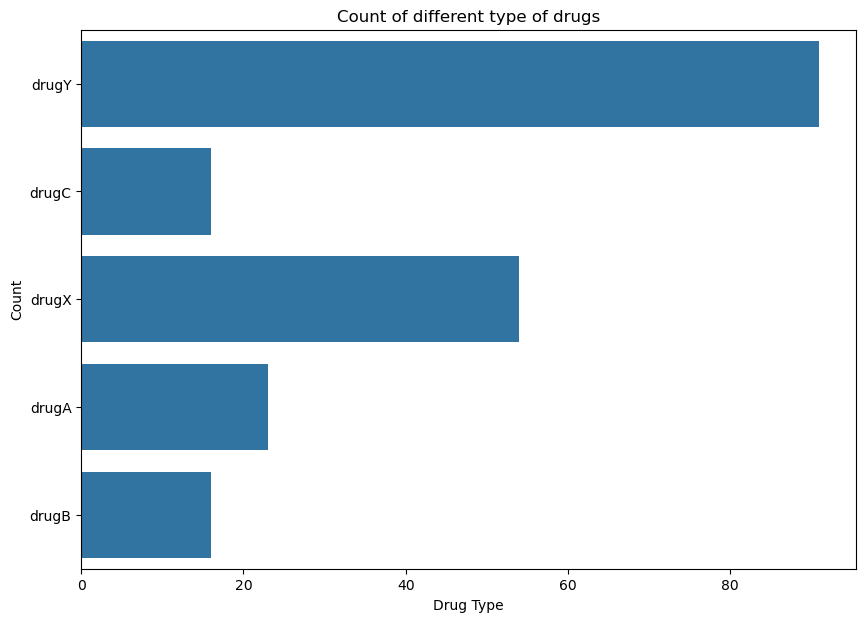

In [292]:
plt.figure(figsize=(10,7))
sns.countplot(drug_df["Drug"])
plt.title("Count of different type of drugs")
plt.xlabel("Drug Type")
plt.ylabel("Count")

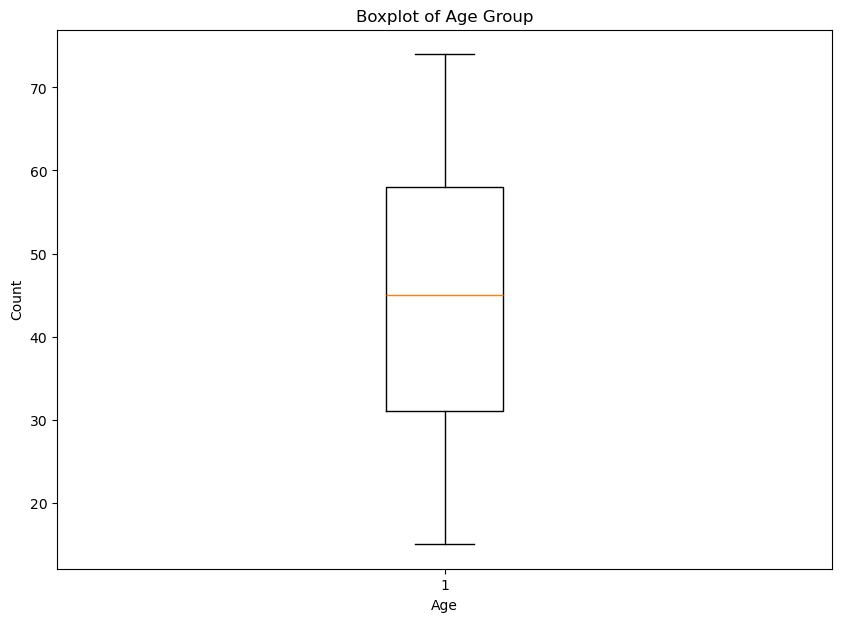

In [293]:
plt.figure(figsize=(10,7))
plt.boxplot(drug_df["Age"])
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

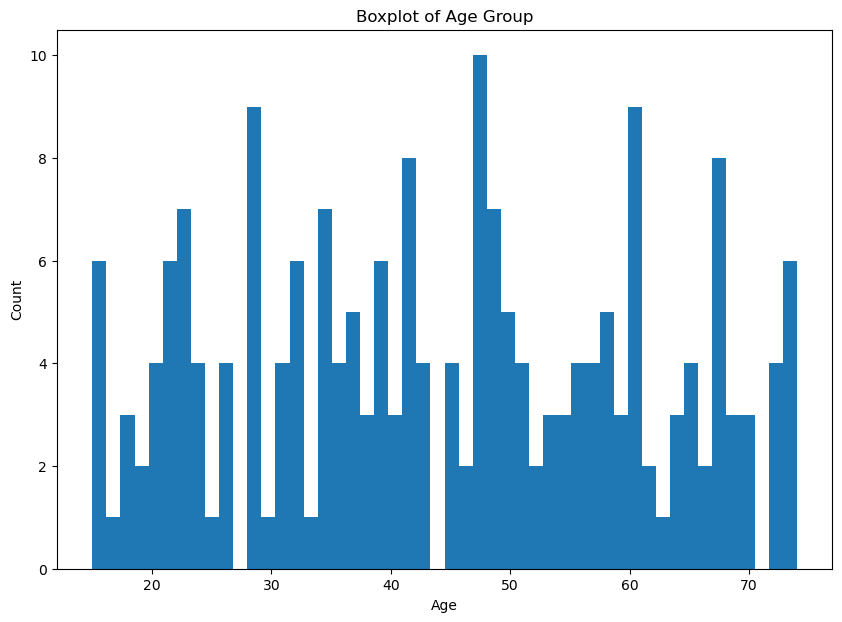

In [294]:
plt.figure(figsize=(10,7))
plt.hist(drug_df["Age"], bins=50)
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

#### Feature Scaling

In [295]:
X = drug_df.drop("Drug", axis=1)
y = drug_df["Drug"]

#### Train Test Split

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(160, 6) (40, 6)
(160,) (40,)


### Building ML Models

#### Random Forest

Random Forest Accuracy: 0.975

 Classification Report:
               precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



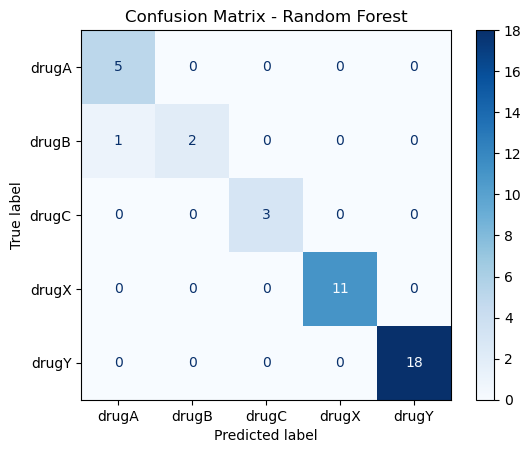


 Cross-Validation Scores: [1.  1.  1.  0.9 1. ]
 Mean CV Accuracy: 0.98

 Dummy Classifier Accuracy: 0.45
 Dummy Report:
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         3
       drugX       0.00      0.00      0.00        11
       drugY       0.45      1.00      0.62        18

    accuracy                           0.45        40
   macro avg       0.09      0.20      0.12        40
weighted avg       0.20      0.45      0.28        40



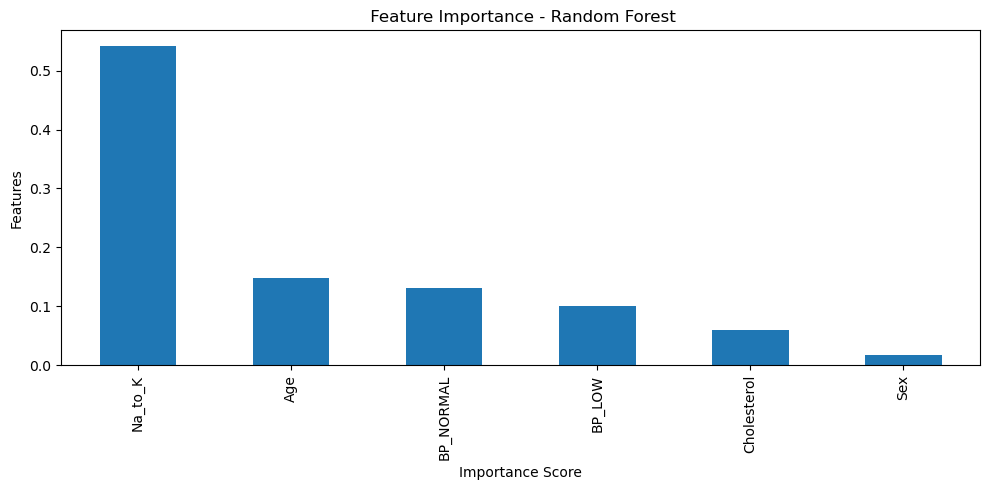

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_preds_rf = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_preds_rf))
print("\n Classification Report:\n", classification_report(y_test, y_preds_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test, cmap='Blues', values_format='d'
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Cross-Validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("\n Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", np.mean(cv_scores).round(3))

# Dummy Classifier for Baseline
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print("\n Dummy Classifier Accuracy:", accuracy_score(y_test, y_dummy))
print(" Dummy Report:\n", classification_report(y_test, y_dummy))

# Feature Importance 
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar')
plt.title(" Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#### Bagging Classifier

Bagging Classifier Accuracy: 0.975

 Classification Report:
               precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



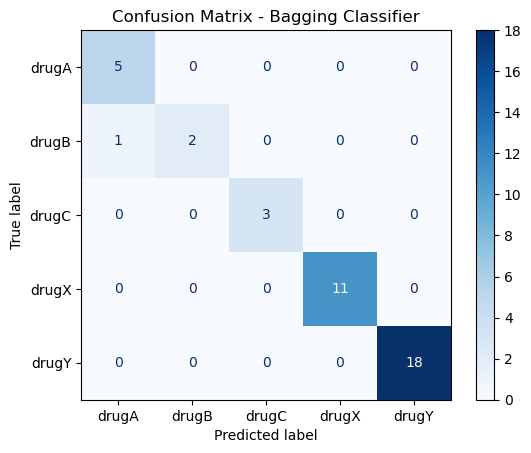


 Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
 Mean CV Accuracy: 0.985

 Dummy Classifier Accuracy: 0.45
 Classification Report (Dummy):
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         3
       drugX       0.00      0.00      0.00        11
       drugY       0.45      1.00      0.62        18

    accuracy                           0.45        40
   macro avg       0.09      0.20      0.12        40
weighted avg       0.20      0.45      0.28        40



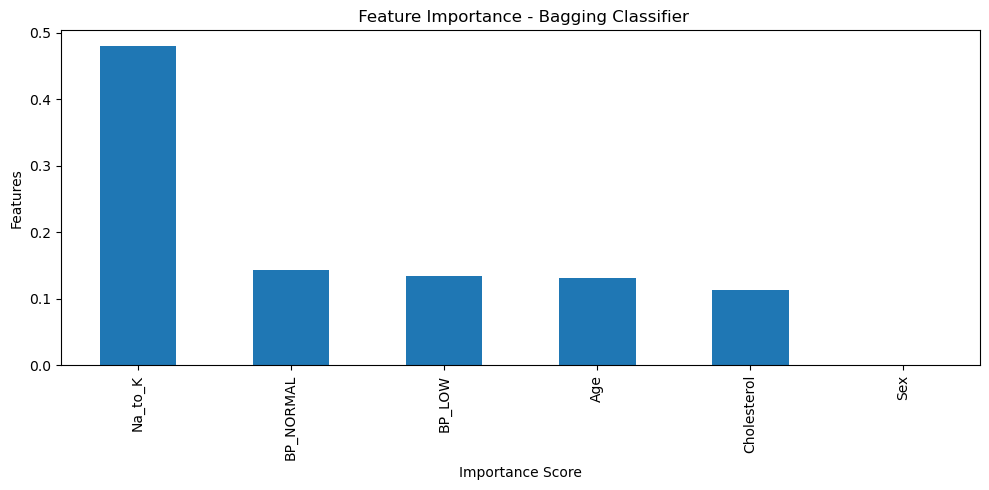

In [300]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Train Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=500)
bagging_clf.fit(X_train, y_train)
y_preds_bag = bagging_clf.predict(X_test)

# Evaluation
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_preds_bag))
print("\n Classification Report:\n", classification_report(y_test, y_preds_bag))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    bagging_clf, X_test, y_test, cmap='Blues', values_format='d'
)
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

# Cross-Validation Accuracy
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')
print("\n Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", np.mean(cv_scores).round(3))

# Dummy Classifier Baseline
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print("\n Dummy Classifier Accuracy:", accuracy_score(y_test, y_dummy))
print(" Classification Report (Dummy):\n", classification_report(y_test, y_dummy))

# Feature Importance 
# You can approximate feature importance by averaging feature importances across all trees
importances = np.mean([tree.feature_importances_ for tree in bagging_clf.estimators_], axis=0)

feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar')
plt.title(" Feature Importance - Bagging Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### LGBM Classifier

 LightGBM Accuracy: 0.975

 Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      0.80      0.89         5
       drugB       1.00      1.00      1.00         3
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.98      0.97      0.98        40



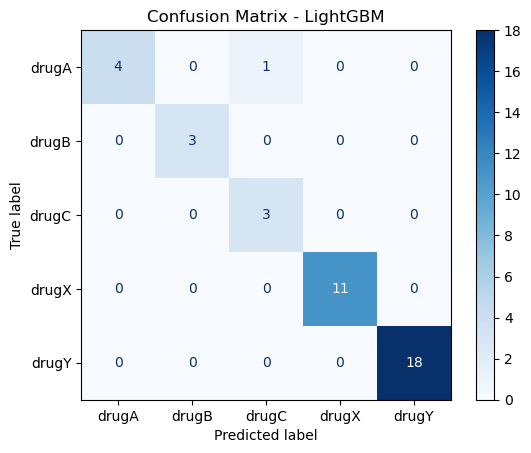


 Cross-Validation Scores: [1.    1.    0.975 0.95  1.   ]
 Mean CV Accuracy: 0.985

 Dummy Classifier Accuracy: 0.45
 Classification Report (Dummy):
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         3
       drugX       0.00      0.00      0.00        11
       drugY       0.45      1.00      0.62        18

    accuracy                           0.45        40
   macro avg       0.09      0.20      0.12        40
weighted avg       0.20      0.45      0.28        40



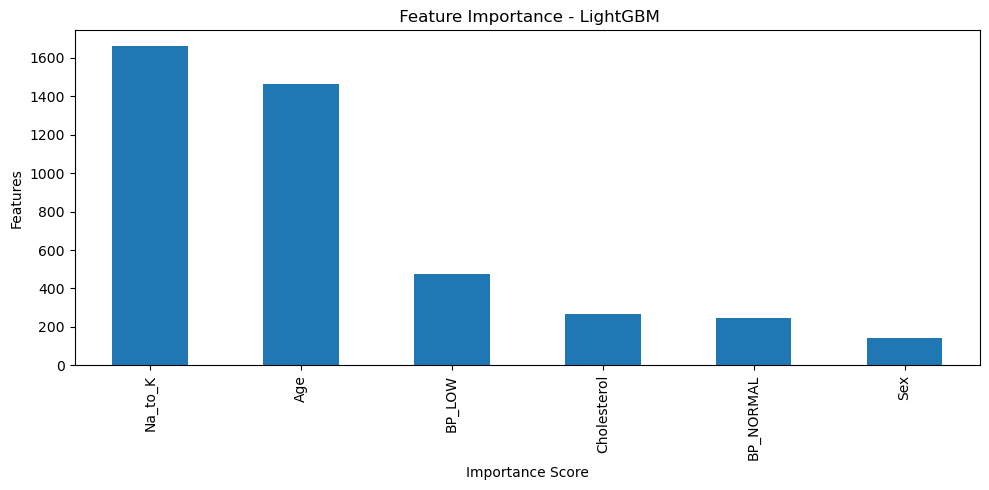

In [301]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Train LightGBM Classifier
lgbm_clf = LGBMClassifier(n_estimators=500, random_state=42, verbose=-1)
lgbm_clf.fit(X_train, y_train)
y_preds_lgbm = lgbm_clf.predict(X_test)

# Evaluation
print(" LightGBM Accuracy:", accuracy_score(y_test, y_preds_lgbm))
print("\n Classification Report:\n", classification_report(y_test, y_preds_lgbm))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    lgbm_clf, X_test, y_test, cmap='Blues', values_format='d'
)
plt.title("Confusion Matrix - LightGBM")
plt.show()

# Cross-Validation
cv_scores = cross_val_score(lgbm_clf, X, y, cv=5, scoring='accuracy')
print("\n Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", np.mean(cv_scores).round(3))

# Dummy Classifier for Baseline
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

print("\n Dummy Classifier Accuracy:", accuracy_score(y_test, y_dummy))
print(" Classification Report (Dummy):\n", classification_report(y_test, y_dummy))

# Feature Importance
feature_importance = pd.Series(lgbm_clf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar')
plt.title(" Feature Importance - LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### Saving the best model

In [302]:
from joblib import dump
MODEL_NAME = "drug-recommender.pkl"
dump(lgbm_clf, MODEL_NAME)

['drug-recommender.pkl']

### THE END

In [1]:
import joblib

# Load the model
model = joblib.load("drug-recommender.pkl")

# Check what features it was trained on
print(model.booster_.feature_name())

['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'BP_LOW', 'BP_NORMAL']
